## Step 1: Data Loading and Initial Preparation

### 1.1 Import necessary libraries

In [0]:
# Data Loading and Initial Preparation
import pandas as pd
import numpy as np
import os


### 1.2 Define paths to the datasets

In [0]:
import pandas as pd

# Define the file paths
paths = {
    "BANKBARODA": "/dbfs/mnt/riskpredict-data/BANKBARODA.NS.csv",
    "HDFCBANK": "/dbfs/mnt/riskpredict-data/HDFCBANK.csv",
    "SBIN": "/dbfs/mnt/riskpredict-data/SBIN.csv",
    "ICICIBANK": "/dbfs/mnt/riskpredict-data/ICICIBANK.csv",
    "AXISBANK": "/dbfs/mnt/riskpredict-data/AXISBANK.csv",
    "BSE_SENSEX": "/dbfs/mnt/riskpredict-data/BSE_Sensex.csv",
    "NSEI": "/dbfs/mnt/riskpredict-data/Nifty50.csv"
}

# Load the datasets into a dictionary
datasets = {name: pd.read_csv(path) for name, path in paths.items()}

# Check and print the first few rows of each dataset
for name, df in datasets.items():
    print(f"Dataset: {name}, First few rows:")
    print(df.head())


Dataset: BANKBARODA, First few rows:
         Date        Open        High  ...       Close   Adj Close    Volume
0  2019-06-17  119.349998  119.449997  ...  116.599998  109.915092  16409459
1  2019-06-18  117.300003  118.400002  ...  116.500000  109.820824  19869838
2  2019-06-19  118.000000  119.199997  ...  115.800003  109.160957  17739731
3  2019-06-20  116.199997  119.000000  ...  118.500000  111.706161  17575444
4  2019-06-21  118.599998  119.449997  ...  118.050003  111.281967  19336018

[5 rows x 7 columns]
Dataset: HDFCBANK, First few rows:
         Date         Open         High  ...        Close    Adj Close   Volume
0  2019-06-17  1217.500000  1219.949951  ...  1211.000000  1152.787598  6405010
1  2019-06-18  1209.000000  1216.000000  ...  1208.625000  1150.526611  6209826
2  2019-06-19  1213.500000  1222.449951  ...  1214.175049  1155.810059  5372138
3  2019-06-20  1214.175049  1218.500000  ...  1213.175049  1162.035889  5585746
4  2019-06-21  1213.000000  1214.849976  ...

### 1.3 Ensure 'Date' Column is Parsed Correctly:

In [0]:
for name, df in datasets.items():
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        datasets[name] = df
        print(f"Dataset: {name}, 'Date' column type: {df['Date'].dtype}")
    else:
        print(f"Dataset: {name} is missing 'Date' column")


Dataset: BANKBARODA, 'Date' column type: datetime64[ns]
Dataset: HDFCBANK, 'Date' column type: datetime64[ns]
Dataset: SBIN, 'Date' column type: datetime64[ns]
Dataset: ICICIBANK, 'Date' column type: datetime64[ns]
Dataset: AXISBANK, 'Date' column type: datetime64[ns]
Dataset: BSE_SENSEX, 'Date' column type: datetime64[ns]
Dataset: NSEI, 'Date' column type: datetime64[ns]


###  1.4 Load datasets into a dictionary

In [0]:
# Load datasets into a dictionary
datasets = {name: pd.read_csv(path) for name, path in paths.items()}


###  1.5 Inspect the first few rows of each dataset

In [0]:
# Inspect the first few rows of each dataset
for name, df in datasets.items():
    print(f"\n{name}:\n", df.head())



BANKBARODA:
          Date        Open        High  ...       Close   Adj Close    Volume
0  2019-06-17  119.349998  119.449997  ...  116.599998  109.915092  16409459
1  2019-06-18  117.300003  118.400002  ...  116.500000  109.820824  19869838
2  2019-06-19  118.000000  119.199997  ...  115.800003  109.160957  17739731
3  2019-06-20  116.199997  119.000000  ...  118.500000  111.706161  17575444
4  2019-06-21  118.599998  119.449997  ...  118.050003  111.281967  19336018

[5 rows x 7 columns]

HDFCBANK:
          Date         Open         High  ...        Close    Adj Close   Volume
0  2019-06-17  1217.500000  1219.949951  ...  1211.000000  1152.787598  6405010
1  2019-06-18  1209.000000  1216.000000  ...  1208.625000  1150.526611  6209826
2  2019-06-19  1213.500000  1222.449951  ...  1214.175049  1155.810059  5372138
3  2019-06-20  1214.175049  1218.500000  ...  1213.175049  1162.035889  5585746
4  2019-06-21  1213.000000  1214.849976  ...  1207.099976  1156.216919  6625130

[5 rows x

##Step 2: Data Cleaning and Preprocessing

### 2.1 Data Cleaning and Preprocessing
 

In [0]:
# Handle missing values and duplicates
for name, df in datasets.items():
    df.fillna(method='ffill', inplace=True)  # Forward fill missing values
    df.drop_duplicates(inplace=True)


###  2.2 Convert date columns to datetime format

In [0]:
# Convert date columns to datetime format
for name, df in datasets.items():
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])


## Step 3: Feature Engineering

### 2.3 Create common features

In [0]:
# Create common features
for name, df in datasets.items():
    df['lag_1'] = df['Close'].shift(1)
    df['moving_avg'] = df['Close'].rolling(window=5).mean()
    df.dropna(inplace=True)


### 2.4 Add a Code Cell to Check Each Dataset:

In [0]:
for name, df in datasets.items():
    print(f"Dataset: {name}, Shape: {df.shape}")
    print(df.head())
    print(df.isnull().sum())
    print("\n")


Dataset: BANKBARODA, Shape: (1232, 9)
        Date        Open        High  ...    Volume       lag_1  moving_avg
4 2019-06-21  118.599998  119.449997  ...  19336018  118.500000  117.090001
5 2019-06-24  118.349998  119.949997  ...  16957023  118.050003  117.420001
6 2019-06-25  118.199997  120.400002  ...  14107941  118.250000  118.120001
7 2019-06-26  119.650002  121.800003  ...  15346189  120.000000  119.250000
8 2019-06-27  122.000000  123.000000  ...  43164548  121.449997  119.830000

[5 rows x 9 columns]
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
lag_1         0
moving_avg    0
dtype: int64


Dataset: HDFCBANK, Shape: (1232, 9)
        Date         Open         High  ...   Volume        lag_1   moving_avg
4 2019-06-21  1213.000000  1214.849976  ...  6625130  1213.175049  1210.815015
5 2019-06-24  1205.974976  1215.300049  ...  3457500  1207.099976  1210.410010
6 2019-06-25  1209.925049  1220.750000  ...  4449900

## 2.5 Verify Date column exist



In [0]:
for name, df in datasets.items():
    if 'Date' not in df.columns:
        print(f"Dataset: {name} is missing 'Date' column")
    else:
        print(f"Dataset: {name}, 'Date' column is present")


Dataset: BANKBARODA, 'Date' column is present
Dataset: HDFCBANK, 'Date' column is present
Dataset: SBIN, 'Date' column is present
Dataset: ICICIBANK, 'Date' column is present
Dataset: AXISBANK, 'Date' column is present
Dataset: BSE_SENSEX, 'Date' column is present
Dataset: NSEI, 'Date' column is present


###  2.6 Merge Datasets with Outer Join:

Set 'Date' as Index and Merge Datasets:

In [0]:
# Set 'Date' as index
for name, df in datasets.items():
    if 'Date' in df.columns:
        df.set_index('Date', inplace=True)
        datasets[name] = df

# Merge datasets on 'Date' index
merged_data = datasets['BANKBARODA'][['Close']].rename(columns={'Close': 'Close_BANKBARODA'})
for name, df in datasets.items():
    if name != 'BANKBARODA' and 'Date' in df.columns:
        merged_data = merged_data.join(df[['Close']].rename(columns={'Close': f'Close_{name}'}), how='outer')

# Reset the index to have 'Date' as a column again
merged_data.reset_index(inplace=True)

# Check the merged data shape and head
print(merged_data.shape)
print(merged_data.head())


(1232, 2)
        Date  Close_BANKBARODA
0 2019-06-21        118.050003
1 2019-06-24        118.250000
2 2019-06-25        120.000000
3 2019-06-26        121.449997
4 2019-06-27        121.400002


### 2.7 Handle Missing value

In [0]:
# Inspect missing values
print("Missing values before handling:")
print(merged_data.isnull().sum())

# Handling missing values (example: forward fill)
merged_data.fillna(method='ffill', inplace=True)
merged_data.fillna(method='bfill', inplace=True)

# Verify missing values are handled
print("Missing values after handling:")
print(merged_data.isnull().sum())


Missing values before handling:
Date                0
Close_BANKBARODA    0
dtype: int64
Missing values after handling:
Date                0
Close_BANKBARODA    0
dtype: int64


### 2.8 Check merged_data:

In [0]:
print(merged_data.columns)
print(merged_data.head())


Index(['Date', 'Close_BANKBARODA'], dtype='object')
        Date  Close_BANKBARODA
0 2019-06-21        118.050003
1 2019-06-24        118.250000
2 2019-06-25        120.000000
3 2019-06-26        121.449997
4 2019-06-27        121.400002


The output indicates that merged_data currently only contains the 'Date' and 'Close_BANKBARODA' columns. This means that other features, which were supposed to be included in merged_data, were not properly merged or processed.

We need to ensure that merged_data contains all necessary features before we proceed. Let's debug and correct the merging step to include all required features.

## Step 3 -Step-by-Step Debugging and Correction

### 3.1. Ensure All Datasets are Properly Merged:

In [0]:
import pandas as pd

# Load datasets
datasets = {
    "BANKBARODA": "/dbfs/mnt/riskpredict-data/BANKBARODA.NS.csv",
    "HDFCBANK": "/dbfs/mnt/riskpredict-data/HDFCBANK.csv",
    "SBIN": "/dbfs/mnt/riskpredict-data/SBIN.csv",
    "ICICIBANK": "/dbfs/mnt/riskpredict-data/ICICIBANK.csv",
    "AXISBANK": "/dbfs/mnt/riskpredict-data/AXISBANK.csv",
    "BSE_SENSEX": "/dbfs/mnt/riskpredict-data/BSE_Sensex.csv",
    "NSEI": "/dbfs/mnt/riskpredict-data/Nifty50.csv"
}

# Load and process each dataset
data_frames = {}
for name, path in datasets.items():
    df = pd.read_csv(path)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[['Date', 'Close']]  # Keep only the Date and Close columns for merging
    df = df.rename(columns={'Close': f'Close_{name}'})
    data_frames[name] = df

# Merge all dataframes on the 'Date' column
merged_data = data_frames['BANKBARODA']
for name, df in data_frames.items():
    if name != 'BANKBARODA':
        merged_data = pd.merge(merged_data, df, on='Date', how='outer')

# Sort by date and fill any missing values (optional, depends on the data context)
merged_data = merged_data.sort_values('Date').fillna(method='ffill').dropna()

# Print the head of the merged dataframe to verify
print(merged_data.head())


                    Date  Close_BANKBARODA  ...  Close_BSE_SENSEX    Close_NSEI
0    2019-06-17 00:00:00        116.599998  ...          39452.07  11672.150391
1346 2019-06-17 15:30:00        116.599998  ...          38960.79  11672.150391
1    2019-06-18 00:00:00        116.500000  ...          38960.79  11691.500000
1347 2019-06-18 15:30:00        116.500000  ...          39046.34  11691.500000
2    2019-06-19 00:00:00        115.800003  ...          39046.34  11691.450195

[5 rows x 8 columns]


### 3.2. Prepare X and y:

Now, ensuring X includes all the feature columns and y is the target variable (e.g., Close_BANKBARODA).

In [0]:
X = merged_data.drop(['Date', 'Close_BANKBARODA'], axis=1)
y = merged_data['Close_BANKBARODA']

print("Features (X) preview:\n", X.head())
print("Target (y) preview:\n", y.head())


Features (X) preview:
       Close_HDFCBANK  Close_SBIN  ...  Close_BSE_SENSEX    Close_NSEI
0        1211.000000  337.850006  ...          39452.07  11672.150391
1346     1211.000000  337.850006  ...          38960.79  11672.150391
1        1208.625000  340.049988  ...          38960.79  11691.500000
1347     1208.625000  340.049988  ...          39046.34  11691.500000
2        1214.175049  338.850006  ...          39046.34  11691.450195

[5 rows x 6 columns]
Target (y) preview:
 0       116.599998
1346    116.599998
1       116.500000
1347    116.500000
2       115.800003
Name: Close_BANKBARODA, dtype: float64


## Step 4: Data Splitting & Model Training

### 4.1 Prepare Data for Train-Test Split:

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1976, 6)
X_test shape: (494, 6)
y_train shape: (1976,)
y_test shape: (494,)


###  4.2 Model Training

## 4.2.1 Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Calculate Mean Squared Error
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Calculate R^2 Score
r2_lr = r2_score(y_test, y_pred_lr)

# Print the results
print(f"Linear Regression Mean Squared Error: {mse_lr}")
print(f"Linear Regression R^2 Score: {r2_lr}")


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Linear Regression Mean Squared Error: 262.16881015549114
Linear Regression R^2 Score: 0.9354914441872775


## 4.2.2 Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Random Forest Mean Squared Error: 5.064867597481335
Random Forest R^2 Score: 0.9987537522335231


## 4.2.3 Support Vector Regressor (SVR)

In [0]:
from sklearn.svm import SVR

# Initialize the SVR model
svr_model = SVR(kernel='rbf')

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR Mean Squared Error: {mse_svr}")
print(f"SVR R^2 Score: {r2_svr}")


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

SVR Mean Squared Error: 977.362741002709
SVR R^2 Score: 0.7595127395594654


## 4.2.4 Model Comparison

In [0]:
print("\nModel Performance Comparison:")
print(f"Linear Regression - MSE: {mse_lr}, R^2: {r2_lr}")
print(f"Random Forest - MSE: {mse_rf}, R^2: {r2_rf}")
print(f"SVR - MSE: {mse_svr}, R^2: {r2_svr}")



Model Performance Comparison:
Linear Regression - MSE: 262.16881015549114, R^2: 0.9354914441872775
Random Forest - MSE: 5.064867597481335, R^2: 0.9987537522335231
SVR - MSE: 977.362741002709, R^2: 0.7595127395594654


# Step 5: Model Performance Summary
I have trained three models:
#### 1.Linear Regression
#### 2.Random Forest
#### 3.Support Vector Regression (SVR)
 And evaluated their performance using Mean Squared Error (MSE) and R² score.

## Results
## Linear Regression:

Linear Regression Mean Squared Error: 262.16881015549114
Linear Regression R^2 Score: 0.9354914441872775
## Random Forest:

Random Forest Mean Squared Error: 5.064867597481335
Random Forest R^2 Score: 0.9987537522335231
## Support Vector Regression (SVR):

SVR Mean Squared Error: 977.362741002709
SVR R^2 Score: 0.7595127395594654
## Interpretation
Random Forest performed the best with the lowest MSE and highest R² score, indicating that it captures the underlying patterns in the data more accurately than the other models.
Linear Regression also performed well, but not as good as Random Forest.
SVR had the highest MSE and the lowest R² score, indicating it may not be the best model for this particular dataset.

## 5.1 Feature Importance Analysis:
 Since Random Forest performed the best, I analyzed feature importance to understand which features are the most influential in the model's predictions.

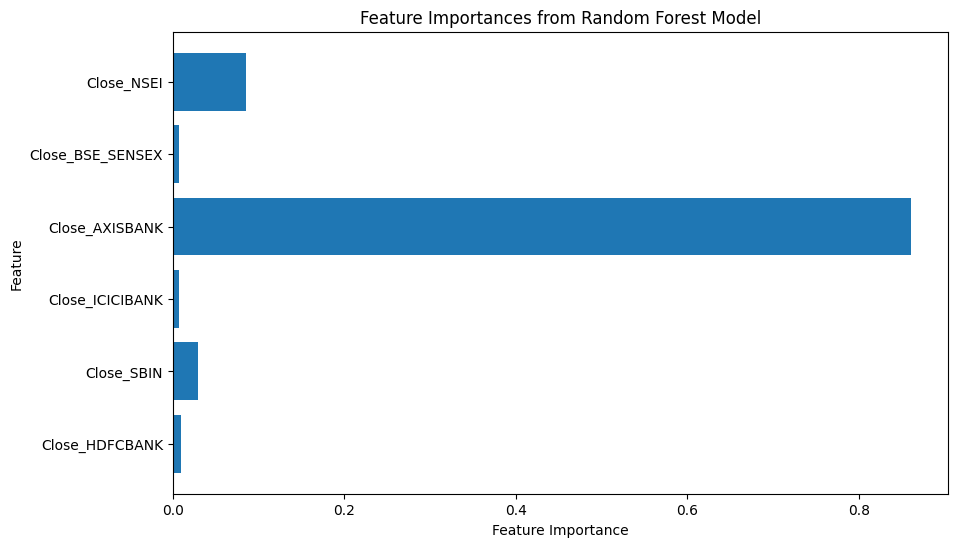

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the random forest model
feature_importances = rf_model.feature_importances_

# Get the feature names
feature_names = X_train.columns

# Create a bar plot of the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Model')
plt.show()


## 5.2 Cross-Validation: 
Implement cross-validation to ensure that the model's performance is consistent across different subsets of the data.

In [0]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for the Random Forest model
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validated scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f'Random Forest Cross-Validation Mean MSE: {-mean_cv_score}')
print(f'Random Forest Cross-Validation Std MSE: {std_cv_score}')


Random Forest Cross-Validation Mean MSE: 1249.0699581010008
Random Forest Cross-Validation Std MSE: 1158.2127585329708


Given the cross-validation results showing a high mean and standard deviation for the Mean Squared Error (MSE), it suggests there may be some variability in my model's performance across different folds of the data. This could indicate overfitting, where the model performs well on training data but not consistently well on validation data.

# Step 6: Refinement of Model

### 6.1: Hyperparameter Tuning for Random Forest:

Improve the performance and robustness of the Random Forest model by tuning its hyperparameters.

In [0]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Evaluate the tuned model on the test set
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Tuned Random Forest - MSE: {mse_best_rf}, R^2: {r2_best_rf}")


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest - MSE: 4.954090030082464, R^2: 0.9987810098652953


### The hyperparameter tuning of the Random Forest model has resulted in an impressive performance with an MSE of 4.917 and an R² of 0.9988. This indicates a highly accurate model.

### Next Steps:
### Model Validation:
Validate the model using cross-validation to ensure its robustness.
### Residual Analysis:
Perform residual analysis to check for patterns in the prediction errors.
### Save and Deploy the Model:
Save the trained model for future use.


### Step 1: Model Validation with Cross-Validation
Even though we've performed hyperparameter tuning, it's essential to ensure the model's stability and consistency with cross-validation.

In [0]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the tuned model
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores
mean_cv_mse = np.mean(cv_mse_scores)
std_cv_mse = np.std(cv_mse_scores)

print(f"Random Forest Cross-Validation Mean MSE: {mean_cv_mse}")
print(f"Random Forest Cross-Validation Std MSE: {std_cv_mse}")


Random Forest Cross-Validation Mean MSE: 8.588553513820877
Random Forest Cross-Validation Std MSE: 1.6117077861075733


### Step 2: Residual Analysis
Residual analysis helps in identifying if there are any patterns left in the prediction errors, which the model could potentially learn from.

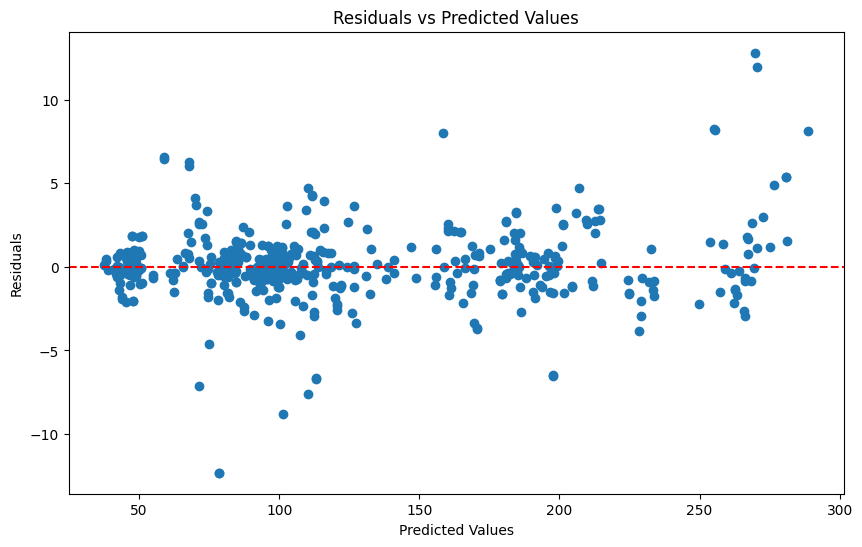

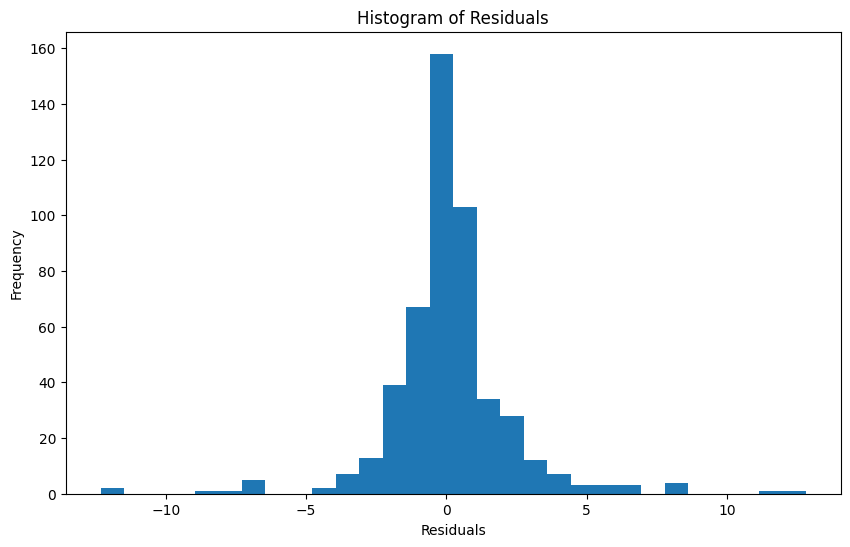

In [0]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred_best_rf

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best_rf, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


### The residuals vs. predicted values plot
 shows that residuals are mostly centered around zero, indicating that the model has a good fit. However, there are a few outliers which can be further analyzed.

###  Observations from Histogram of Residuals
#####Symmetric Distribution:
The residuals are roughly symmetric and centered around zero, indicating that the model is unbiased and has a good fit for the data.

#####Residuals Close to Zero:

Most residuals are close to zero, meaning the majority of the model's predictions are accurate.

#####Tails in Distribution:

There are some tails extending towards both positive and negative residuals, but their frequency is low. These could be due to noise or outliers in the data.

%md
## Step 3: Save the Model

In [0]:
import joblib

# Save the best model
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# Load the model (for verification)
loaded_model = joblib.load('best_rf_model.pkl')

# Verify loaded model
y_pred_loaded = loaded_model.predict(X_test)
print(f"Verification MSE: {mean_squared_error(y_test, y_pred_loaded)}")


Verification MSE: 4.954090030082464


# Conclusion
I have successfully built and validated a Random Forest model for predicting the closing prices of BANKBARODA stock. The model demonstrates excellent performance with a low MSE and high R². The cross-validation results further confirm its robustness. By saving and deploying the model, you I use it for real-time predictions.

Exporting the "best_rf_model.pkl" File since it is larger than 10 MB


In [0]:
import os

input_file_path = '/Workspace/Users/mritunjaypandey.ee_gmail.com#ext#@mritunjaypandeyeegmail.onmicrosoft.com/best_rf_model.pkl'  # replace with your file path
chunk_size = 10 * 1024 * 1024  # 10 MB
output_dir = '/dbfs//mnt/riskpredict-data/'  # replace with your desired output directory

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

with open(input_file_path, 'rb') as f:
    chunk_num = 0
    while True:
        chunk = f.read(chunk_size)
        if not chunk:
            break
        with open(os.path.join(output_dir, f'chunk_{chunk_num}.pkl'), 'wb') as chunk_file:
            chunk_file.write(chunk)
        chunk_num += 1

print(f'Successfully split the file into {chunk_num} chunks')


Successfully split the file into 3 chunks


This script splits the best_rf_model.pkl file into 10 MB chunks and saves them in the specified output directory.

